# **Mobile Price Range Prediction**

##### **Project type** - Classification
##### **Contribution** - Individual
##### **Name**- Shrikant N Patole.

## Project Summary

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

## Github Link

## Problem Statement

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

## 1.Know Your Data

### Importing Libraries 

In [23]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Importing the dataset 
dataset=pd.read_csv('data_mobile_price_range.csv')

In [25]:
#Initial overview of data
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [26]:
dataset.shape

(2000, 21)

### Variable Description
Dataset as 21 features and 2000 entries. The meanings of the features are given below.

**battery_power**: Total energy a battery can store in one time measured in mAh

**blue**: Has bluetooth or not

**clock_speed**: speed at which microprocessor executes instructions

**dual_sim**: Has dual sim support or not

**fc**: Front Camera mega pixels

**four_g**: Has 4G or not

**int_memory**: Internal Memory in Gigabytes

**m_dep**: Mobile Depth in cm

**mobile_wt**: Weight of mobile phone

**n_cores**: Number of cores of processor

**pc**: Primary Camera mega pixels

**px_height**: Pixel Resolution Height

**px_width**: Pixel Resolution Width

**ram**: Random Access Memory in Mega Byte

**sc_h**: Screen Height of mobile in cm

**sc_w**: Screen Width of mobile in cm

**talk_time**: longest time that a single battery charge will last when you are

**three_g**: Has 3G or not

**touch_screen**: Has touch screen or not

**wifi**: Has wifi or not

**price_range**: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [28]:
#checking null values in the data
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [29]:
#Duplicates and null values
len(dataset[dataset.duplicated()])

0

In [30]:
#Detailed stats of data
pd.set_option('display.max_columns', None)
dataset.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Exploratory Data analysis

#### 1.Distribution of battery power across Price range

<Axes: xlabel='price_range', ylabel='battery_power'>

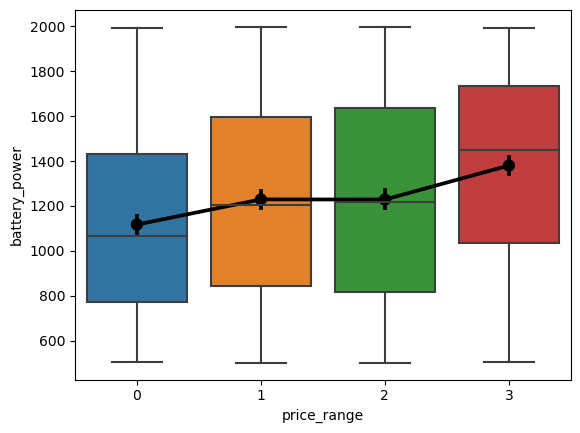

In [31]:
sns.pointplot(x='price_range',y='battery_power',data=dataset,color='Black')
sns.boxplot(x='price_range',y='battery_power',data=dataset)

#### 2.Distribution of RAM across price range

<Axes: xlabel='price_range', ylabel='ram'>

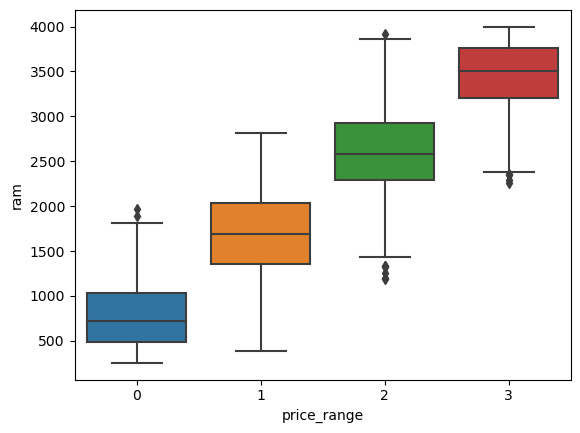

In [32]:
sns.boxplot(x='price_range',y='ram',data=dataset)

#### 3.DIstribution of Internal memory across price

<Axes: xlabel='price_range', ylabel='int_memory'>

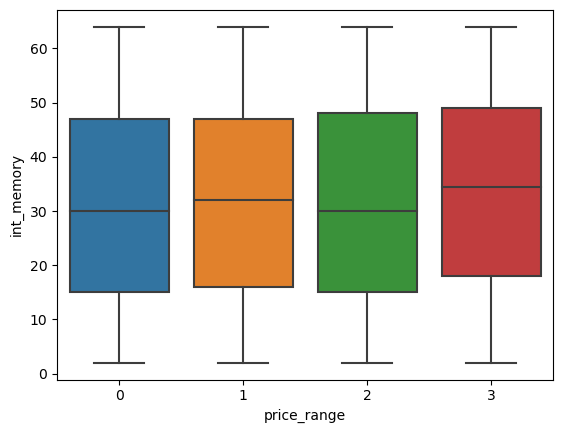

In [33]:
sns.boxplot(x='price_range',y='int_memory',data=dataset)

#### 4. Effect of the screen resolution on the price range

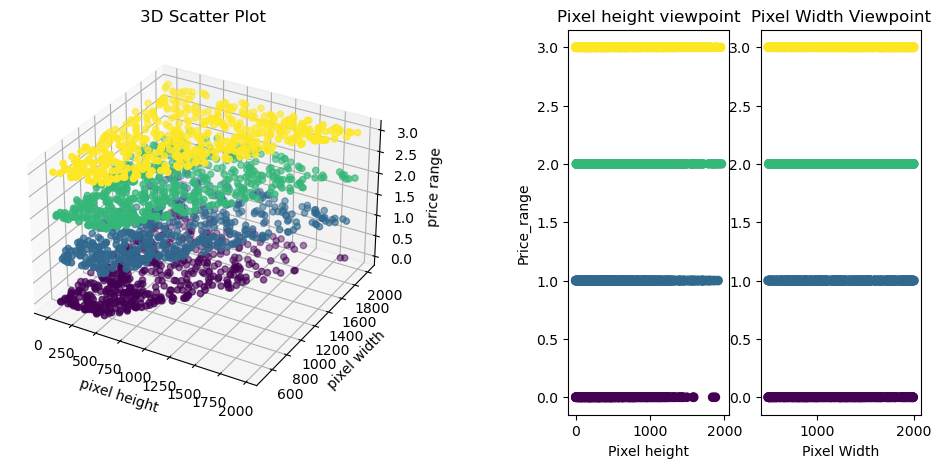

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1,2,1, projection='3d')

# Plot the data points
ax.scatter('px_height','px_width','price_range', c='price_range', cmap='viridis', marker='o',data=dataset)

# Set labels for each axis
ax.set_xlabel('pixel height')
ax.set_ylabel('pixel width')
ax.set_zlabel('price range')
plt.title('3D Scatter Plot')

# Set aspect ratio of 3D scatter plot
ax.set_box_aspect([3,3,2])  # Adjust aspect ratio to make it wider

# Viewpoint from pixel height
ax2 = fig.add_subplot(1,5,4)
ax2.scatter('px_height', 'price_range', c='price_range', cmap='viridis',label='Pixel Height',data=dataset)
ax2.set_xlabel('Pixel height')
ax2.set_ylabel('Price_range')
ax2.set_title('Pixel height viewpoint')


# Viewpoint from independent_var2
ax3 = fig.add_subplot(1, 5, 5)
ax3.scatter('px_width','price_range',c='price_range', cmap='viridis', label='Pixel Width',data=dataset)
ax3.set_xlabel('Pixel Width')

ax3.set_title('Pixel Width Viewpoint')

# Adjust width ratios
# Define width ratios for subplots


#plt.gcf().set_figwidth(15)

plt.tight_layout()
plt.show()

#### Price variation with Microprocessor capability 

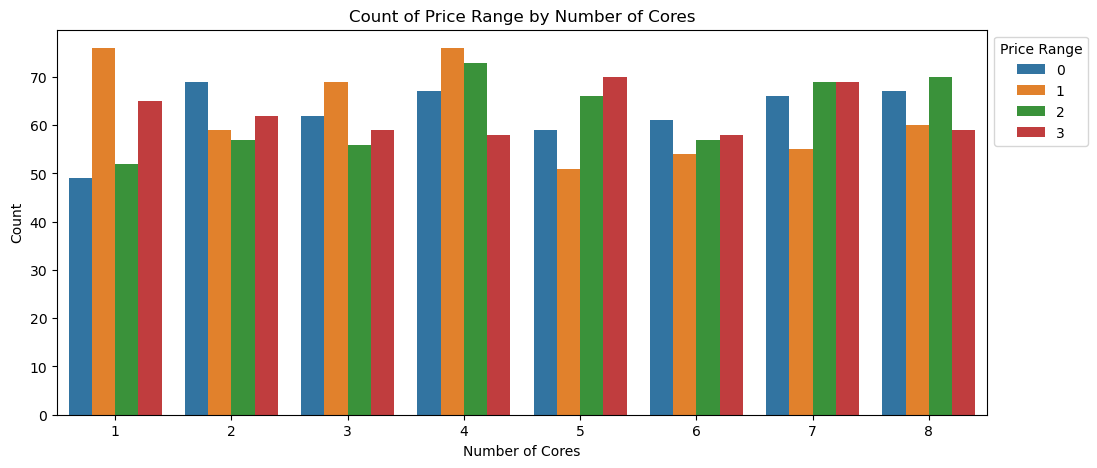

In [35]:
plt.figure(figsize=(12, 5))
sns.countplot(x='n_cores', hue='price_range', data=dataset)
plt.title('Count of Price Range by Number of Cores')
plt.xlabel('Number of Cores')
plt.ylabel('Count')
plt.legend(title='Price Range', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

<Axes: xlabel='price_range', ylabel='clock_speed'>

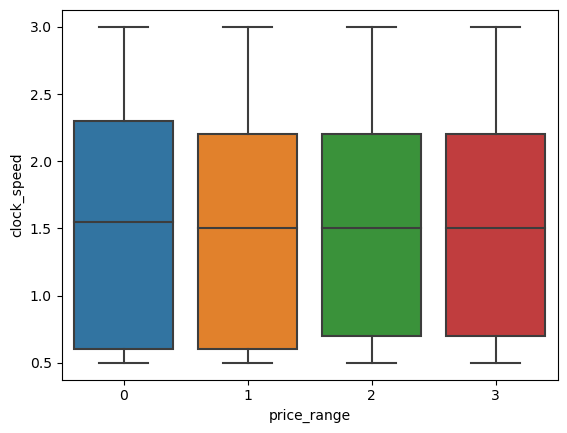

In [36]:
sns.boxplot(x='price_range',y='clock_speed',data=dataset)

#### Categorical values

In [37]:
categorical_col = ['blue','dual_sim','four_g','three_g','touch_screen','price_range']

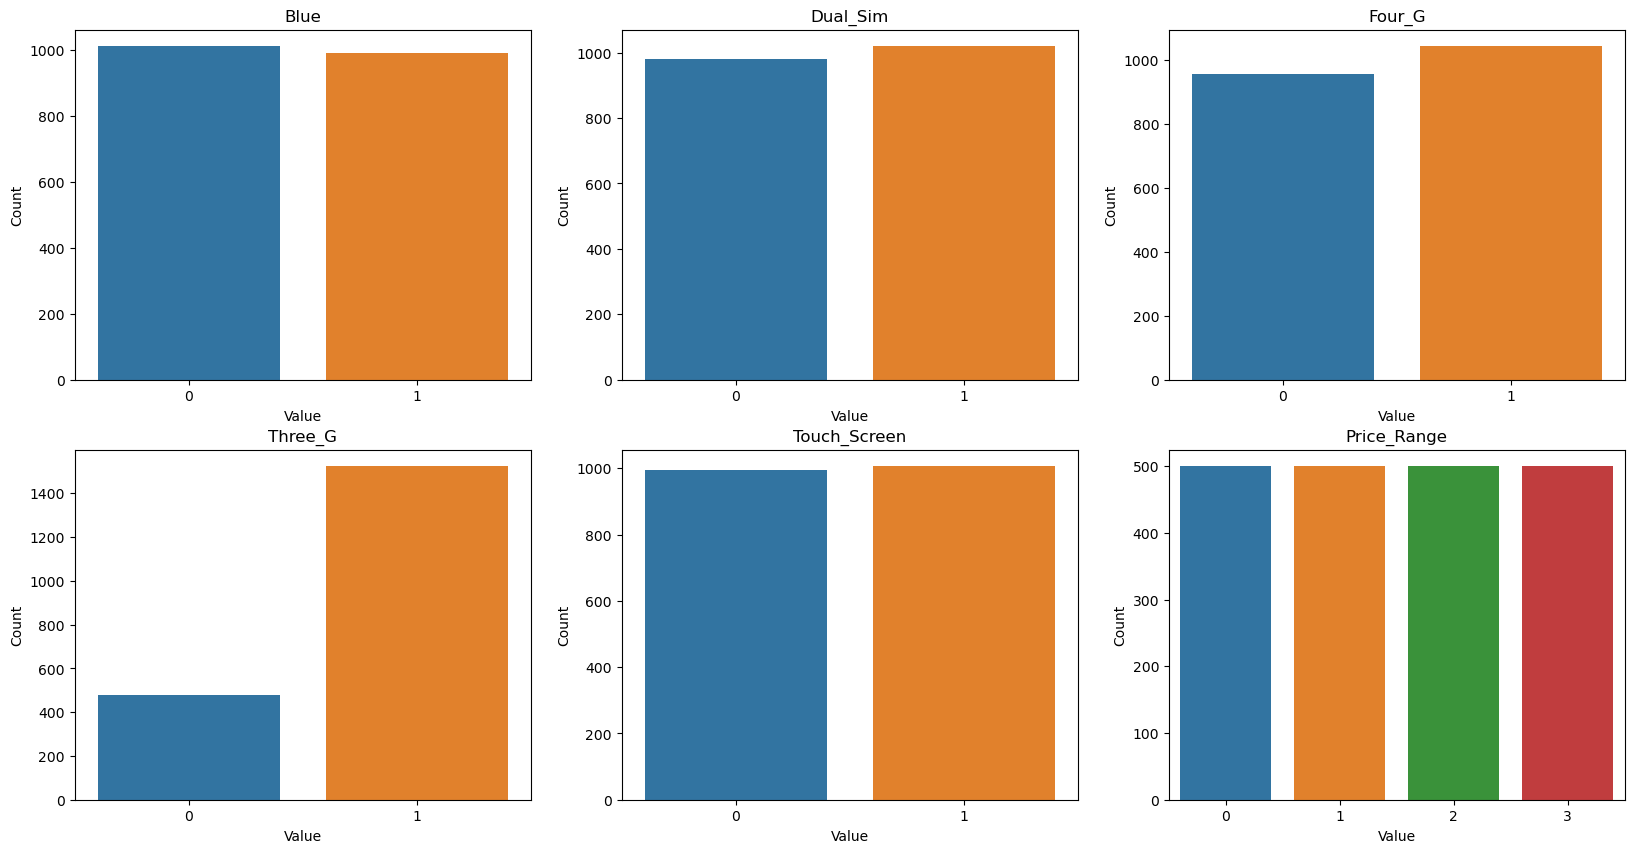

In [38]:
fig,axes = plt.subplots(2,3,figsize = (20,10))
# Flatten the axes array for easy iteration
axes = axes.flatten()
for i, variable in enumerate(categorical_col):
    sns.countplot(x=dataset[variable], ax=axes[i])
    axes[i].set_title(f'{variable.title()}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')
 
  # Adjust layout
#plt.tight_layout()
plt.show()
 

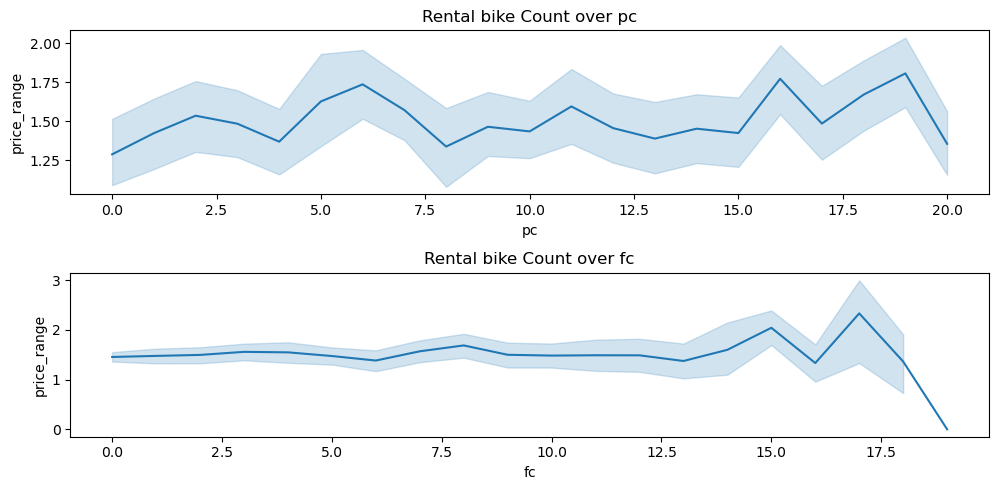

In [39]:
cam_columns=['pc','fc']
n=1
plt.figure(figsize=(10,5))
for i in cam_columns:
  plt.subplot(2,1,n)
  n=n+1
  sns.lineplot(x=dataset[i],y=dataset['price_range'])
  plt.title(f"Rental bike Count over {i}")
  plt.tight_layout()
plt.show()

#### Dependency of Internet services on the price range

In [40]:
# Extract values where column1 is 0 and column2 is 1
three_g_phones = dataset[(dataset['four_g'] == 0) & (dataset['three_g'] == 1)]

# Extract values where both column1 and column2 are 0
no_internet_phones = dataset[(dataset['four_g'] == 0) & (dataset['three_g'] == 0)]

# Classify extracted values based on the third column containing categorical values
grouped_column2_1 = three_g_phones.groupby('price_range').size().reset_index(name='count')
grouped_both_0 = no_internet_phones.groupby('price_range').size().reset_index(name='count')

print("Values where column1 is 0 and column2 is 1:")
print(grouped_column2_1)
print("\nValues where both column1 and column2 are 0:")
print(grouped_both_0)

Values where column1 is 0 and column2 is 1:
   price_range  count
0            0    114
1            1    116
2            2    140
3            3    110

Values where both column1 and column2 are 0:
   price_range  count
0            0    127
1            1    122
2            2    113
3            3    115


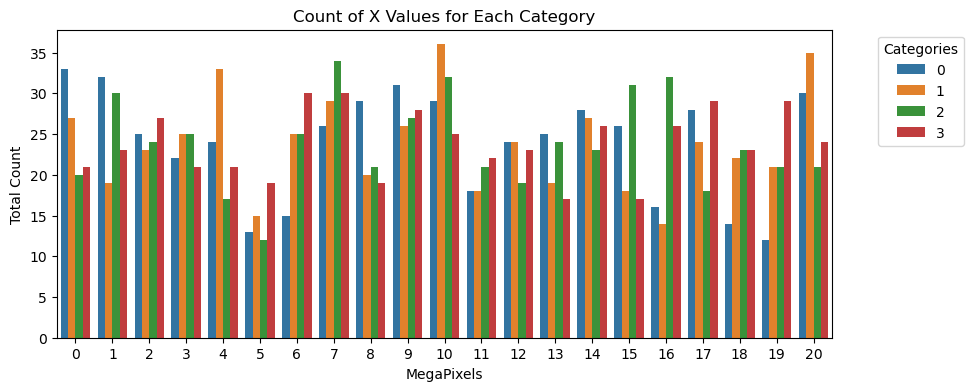

In [47]:
# Create a bar plot
plt.figure(figsize=(10, 4))
sns.countplot(x='pc', hue='price_range', data=dataset)
plt.xlabel('MegaPixels')
plt.ylabel('Total Count')
plt.title('Count of X Values for Each Category')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

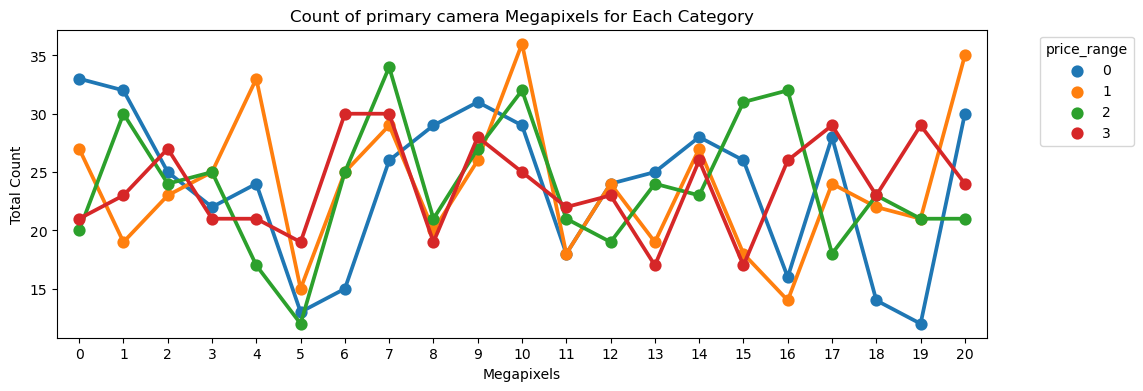

In [42]:
counts = dataset.groupby(['pc', 'price_range']).size().reset_index(name='count')

# Create a point plot
plt.figure(figsize=(12, 4))
sns.pointplot(x='pc', y='count', hue='price_range', data=counts)
plt.xlabel('Megapixels')
plt.ylabel('Total Count')
plt.title('Count of primary camera Megapixels for Each Category')
plt.legend(title='price_range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

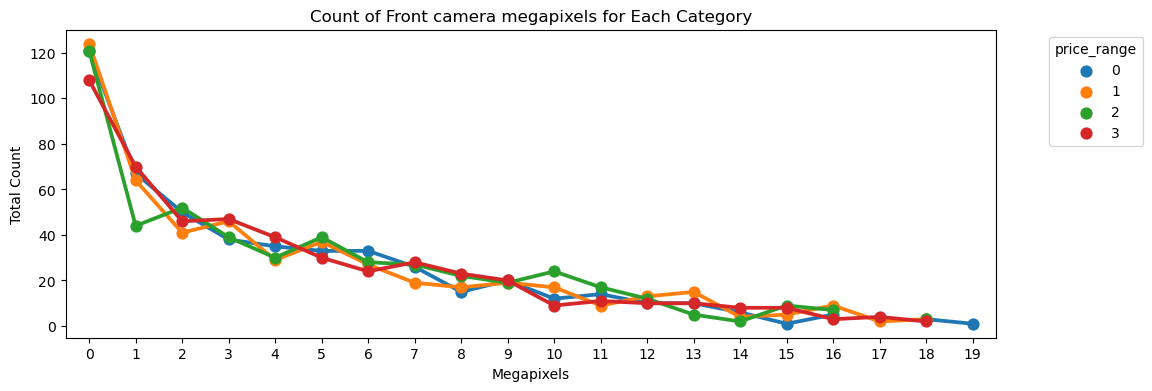

In [43]:
counts = dataset.groupby(['fc', 'price_range']).size().reset_index(name='count')

# Create a point plot
plt.figure(figsize=(12, 4))
sns.pointplot(x='fc', y='count', hue='price_range', data=counts)
plt.xlabel('Megapixels')
plt.ylabel('Total Count')
plt.title('Count of Front camera megapixels for Each Category')
plt.legend(title='price_range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [44]:
counts

,fc,price_range,count
0,0,0,121
1,0,1,124
2,0,2,121
3,0,3,108
4,1,0,67
...,...,...,...
70,18,0,3
71,18,1,3
72,18,2,3
73,18,3,2
